In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats

# Data Preparation

1) Load the dataset for the S&P 500
2) Format the date to datetime format
3) Sort values by date from oldest to newest
4) Repeat 1-3 for Nvidia
5) Merge dataframes on the Date column using the S&P 500 as the leading dataframe
6) create log returns
7) Drop missing observations (NaN)


In [11]:
spx = (
    pd.read_excel('SPX.xlsx')
    .rename(columns={'PX_LAST': 'SPX'})
)
spx['Date'] = pd.to_datetime(spx['Date'])
spx = spx.sort_values('Date').reset_index(drop=True)

nvda = (
    pd.read_excel('NVDA.xlsx')
    .rename(columns={'PX_LAST': 'NVDA'})
)
nvda['Date'] = pd.to_datetime(nvda['Date'])
nvda = nvda.sort_values('Date').reset_index(drop=True)

data = (
    spx.merge(nvda, on='Date', how='left')
)

data['SPX_log_return'] = np.log(data['SPX']).diff()
data['NVDA_log_return'] = np.log(data['NVDA']).diff()

data = data.dropna().reset_index(drop=True)
data.head()


,Date,SPX,NVDA,SPX_log_return,NVDA_log_return
0,2023-01-04,3852.97,14.749,0.007511,0.029867
1,2023-01-05,3808.10,14.265,-0.011714,-0.033366
2,2023-01-06,3895.08,14.859,0.022584,0.040797
3,2023-01-09,3892.09,15.628,-0.000768,0.050458
4,2023-01-10,3919.25,15.909,0.006954,0.017821


# Descriptive Stats for Log-Returns (both assets)

1) Get initial overview with .describe()

In [5]:
data.describe()

,Date,SPX,NVDA,SPX_log_return,NVDA_log_return
count,676,676.000000,676.000000,676.000000,676.000000
mean,2024-05-09 09:43:40.118343168,5151.449009,90.086915,0.000809,0.003705
min,2023-01-04 00:00:00,3808.100000,14.265000,-0.061609,-0.185946
25%,2023-09-06 18:00:00,4414.327500,44.676000,-0.003501,-0.013741
50%,2024-05-08 12:00:00,5216.135000,92.309500,0.000944,0.003924
75%,2025-01-10 18:00:00,5837.532500,131.175000,0.005861,0.021791
max,2025-09-15 00:00:00,6609.400000,183.160000,0.090895,0.218088
std,NaN,765.608040,48.060502,0.009663,0.032049


1) Store means in new variables
2) Store variance in new variables
3) Store standard deviation in new variables
4) Store skewness in new variables
5) Store kurtosis in new variables

In [6]:
spx_mean = data['SPX_log_return'].mean()
spx_variance = data['SPX_log_return'].var()
spx_std = data['SPX_log_return'].std()
spx_skewness = data['SPX_log_return'].skew()
spx_kurtosis = data['SPX_log_return'].kurtosis()

nvda_mean = data['NVDA_log_return'].mean()
nvda_variance = data['NVDA_log_return'].var()
nvda_std = data['NVDA_log_return'].std()
nvda_skewness = data['NVDA_log_return'].skew()
nvda_kurtosis = data['NVDA_log_return'].kurtosis()


1) Print results for SPX

In [7]:
print(f"SPX log return mean: {spx_mean:.6f}")
print(f"SPX log return variance: {spx_variance:.6f}")
print(f"SPX log return standard deviation: {spx_std:.6f}")
print(f"SPX log return skewness: {spx_skewness:.6f}")
print(f"SPX log return kurtosis: {spx_kurtosis:.6f}")


SPX log return mean: 0.000809
SPX log return variance: 0.000093
SPX log return standard deviation: 0.009663
SPX log return skewness: 0.379412
SPX log return kurtosis: 14.485776


1) Print results for NVDA

In [8]:
print(f"NVDA log return mean: {nvda_mean:.6f}")
print(f"NVDA log return variance: {nvda_variance:.6f}")
print(f"NVDA log return standard deviation: {nvda_std:.6f}")
print(f"NVDA log return skewness: {nvda_skewness:.6f}")
print(f"NVDA log return kurtosis: {nvda_kurtosis:.6f}")


NVDA log return mean: 0.003705
NVDA log return variance: 0.001027
NVDA log return standard deviation: 0.032049
NVDA log return skewness: 0.400412
NVDA log return kurtosis: 6.564691


## Visual Observation

1) Plot time series of asset prices / index values for S&P 500 and NVIDIA using a graph with two y-axes
2) Plot the time series of daily log returns of both assets in one graph
3) Create a scatter plot of daily log returns of both assets

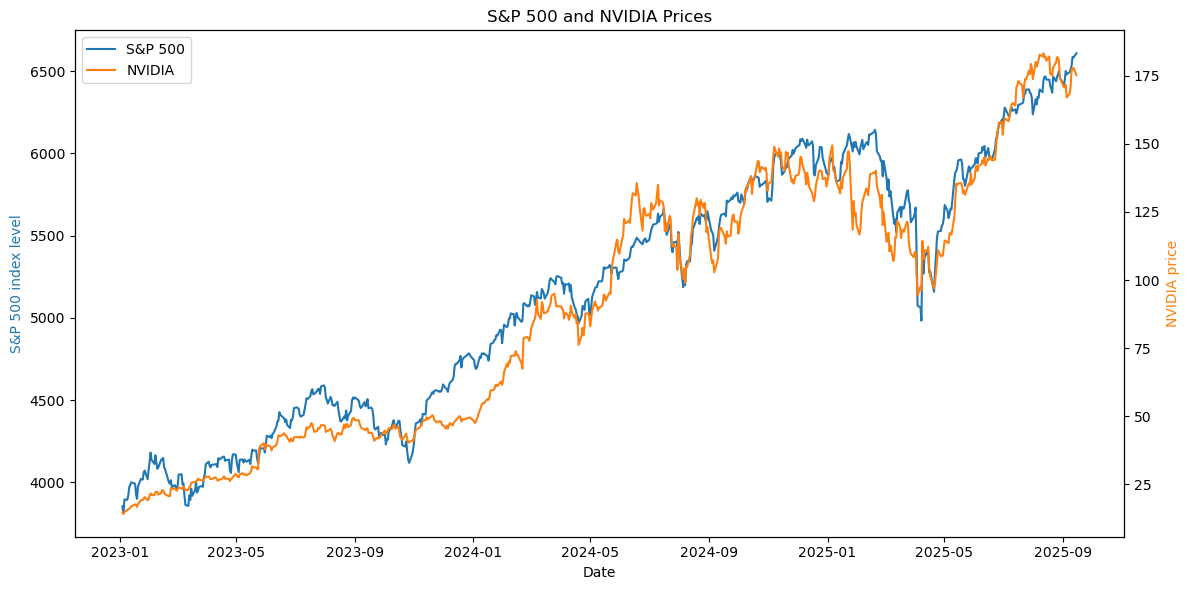

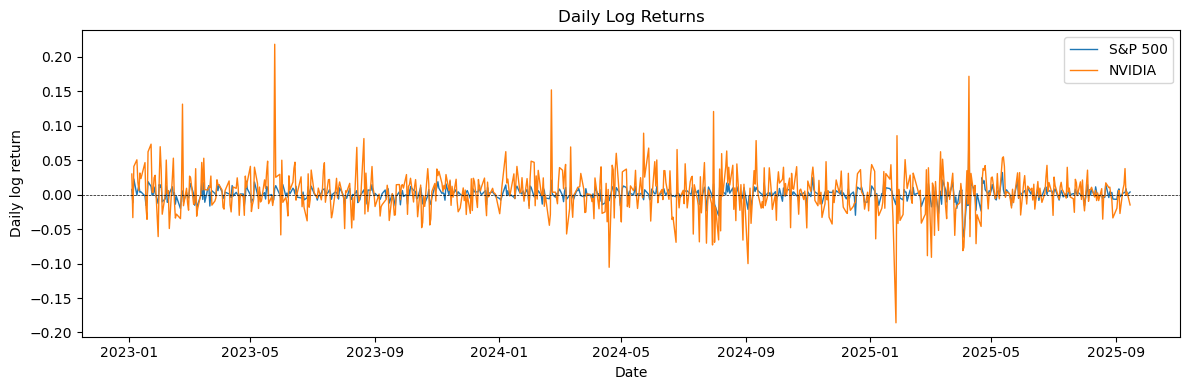

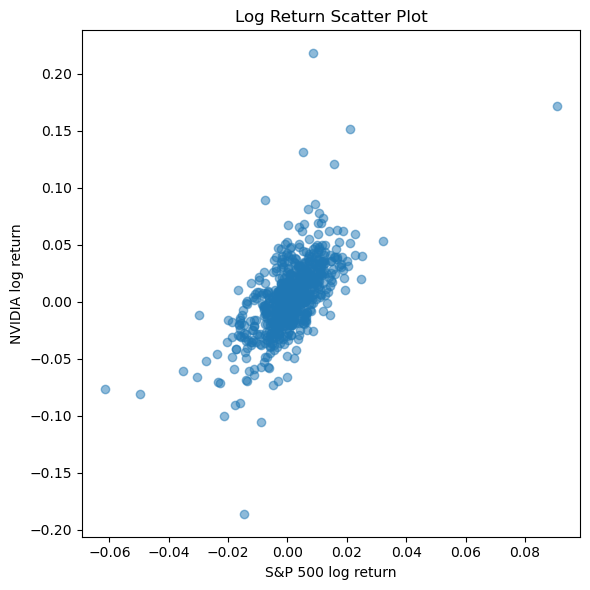

In [9]:
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()
ax1.plot(data['Date'], data['SPX'], color='tab:blue', label='S&P 500')
ax2.plot(data['Date'], data['NVDA'], color='tab:orange', label='NVIDIA')
ax1.set_xlabel('Date')
ax1.set_ylabel('S&P 500 index level', color='tab:blue')
ax2.set_ylabel('NVIDIA price', color='tab:orange')
ax1.set_title('S&P 500 and NVIDIA Prices')
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')
fig.tight_layout()

fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(data['Date'], data['SPX_log_return'], label='S&P 500', linewidth=1)
ax.plot(data['Date'], data['NVDA_log_return'], label='NVIDIA', linewidth=1)
ax.axhline(0, color='black', linewidth=0.5, linestyle='--')
ax.set_xlabel('Date')
ax.set_ylabel('Daily log return')
ax.set_title('Daily Log Returns')
ax.legend()
fig.tight_layout()

fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(data['SPX_log_return'], data['NVDA_log_return'], alpha=0.5)
ax.set_xlabel('S&P 500 log return')
ax.set_ylabel('NVIDIA log return')
ax.set_title('Log Return Scatter Plot')
fig.tight_layout()


# OLS Regression

1) Regress log returns of NVDA on log returns of SPX
2) Extract and analyze the results (summary function)

In [10]:
X = sm.add_constant(data['SPX_log_return'])
y = data['NVDA_log_return']
ols_results = sm.OLS(y, X).fit()
ols_results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        NVDA_log_return   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     486.7
Date:                Tue, 21 Oct 2025   Prob (F-statistic):           1.33e-81
Time:                        22:10:56   Log-Likelihood:                 1550.8
No. Observations:                 676   AIC:                            -3098.
Df Residuals:                     674   BIC:                            -3089.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0020      0.001      2.085      0.037       0.000       0.004
SPX_log_return     2.1476      0.097     22.061      0.000       1.956       2.339
==============================================================================
Omnibus:                      189.484   Durbin-Watson:                   2.101
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2841.278
Skew:                           0.817   Prob(JB):                         0.00
Kurtosis:                      12.910   Cond. No.                         104.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""